## Supplementary figure: percolation of defects

In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
col1 = plt.cm.twilight(0.2)
col2 = plt.cm.twilight(0.65)
#
figpath = "data/plot/paper/suppinf/"
figsubpathstr = ['eigV']
paths = {str: f"{figpath}{str}/" for str in figsubpathstr}
_ = [os.makedirs(path, exist_ok=True) for path in paths.values()]

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


### Single flip
- todo: check dynamics coincide with eignstate

In [ ]:
latt = Lattice2D(side1=16, 
                 geometry='squared', 
                 pbc=True)
latt.flip_sel_edges(latt.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H)
latt.compute_k_eigvV()
G_edges_ww = latt.G.edges(data='weight')

col1 = plt.cm.twilight(0.2)
col2 = plt.cm.twilight(0.65)

edgecol = ['lightblue' if e[2] > 0 else 'red' for e in G_edges_ww]
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal');
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)


nx.draw(latt.G, ax=ax, cmap=custom_cmap, pos=latt.posG, edge_color=edgecol, node_size=100, node_color=-np.abs(latt.eigV[0]), width=2)
fig.savefig(f"{figpath}{latt.geometry}_singleflip.pdf", bbox_inches='tight', transparent=True, pad_inches=0)
plt.close('all')

In [ ]:
sizes = [16, 32, 64, 128, 256, 512]
lattices = {}
for side in sizes:
    lattices[side] = Lattice2D(#
        side1 = side,
        geometry = 'squared'
    )
    lattice = lattices[side]
    #
    lattice.init_weights()
    lattice.flip_sel_edges(lattice.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H)
    eigvpath = f"{paths['eigV']}{lattice.geometry}_{lattice.syshapePTH}_singleflip.npy"
    if os.path.exists(eigvpath):
        setattr(lattices[side], 'eigV', np.load(eigvpath))
    else:
        lattice.compute_k_eigvV()
        with open(eigvpath, 'wb') as f:
            np.save(f, np.abs(lattices[side].eigV))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y})}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}  
    eigen_state = np.abs(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state/np.min(eigen_state))[:, lattices[side].side1//2]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    ax.plot(x, phi_plot, **kwdict)
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattice.r_c, +lattice.r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{paths['eigV']}{lattices[sizes[0]].geometry}_singleflip_para.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(\bar{x},\, y)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$y$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}  
    eigen_state = np.abs(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state/np.min(eigen_state))[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))-.5
    ax.plot(x, phi_plot, **kwdict)
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattice.r_c, +lattice.r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geometry}_singleflip_perp.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

### Single flip triangle

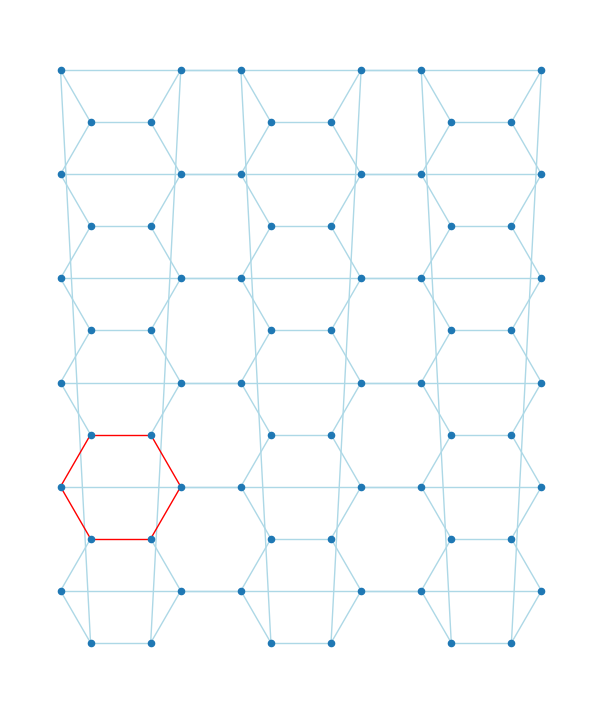

In [2]:
latt = Lattice2D(side1 = 6,
                 geometry='hexagonal', 
                 pbc=True)

latt.flip_sel_edges(latt.neg_weights_dict.get_neg_weights_dict_h_hexagon(15))

plt.gca().set_aspect('equal')
G_edges_ww = latt.G.edges(data='weight')
edgecol = ['lightblue' if e[2] > 0 else 'r' for e in G_edges_ww]
latt.compute_k_eigvV()
# nodecol = [0 if i in listofGnodes else j for i, j in zip(list(latt.G.nodes()), latt.eigV[0])]
nx.draw(latt.G, pos=latt.posG, edge_color=edgecol,  node_size=20)

In [3]:
sizes = [16, 32, 64]
lattices = {}
for side in sizes:
    lattices[side] = Lattice2D(#
        side1 = side,
        geometry = 'triangular'
    )
    lattice = lattices[side]
    #
    lattice.init_weights()
    lattice.flip_sel_edges({(lattice.N//2, lattice.N//2+1): -1})
    eigvpath = f"{paths['eigV']}{lattice.geometry}_{lattice.syshapePTH}_singleflip.npy"
    if os.path.exists(eigvpath):
        setattr(lattices[side], 'eigV', np.load(eigvpath))
    else:
        lattice.compute_k_eigvV()
        with open(eigvpath, 'wb') as f:
            np.save(f, np.abs(lattices[side].eigV))

In [5]:
lattice.neg_weights_dict.H_cent_edge,  lattice.neg_weights_dict.H_cent_edge[0]-1

((2111, 2112), 2110)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 9 -0.5499999999999998
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 14 -0.5500000000000007
[1.         1.08810363 1.17478045 1.24256397 1.2928858  1.32881576
 1.3525306  1.36530738 1.36776008 1.35998106 1.3415553  1.31143246
 1.26760679 1.20654576 1.12289616 1.01726515] 0 -0.5499999999999998


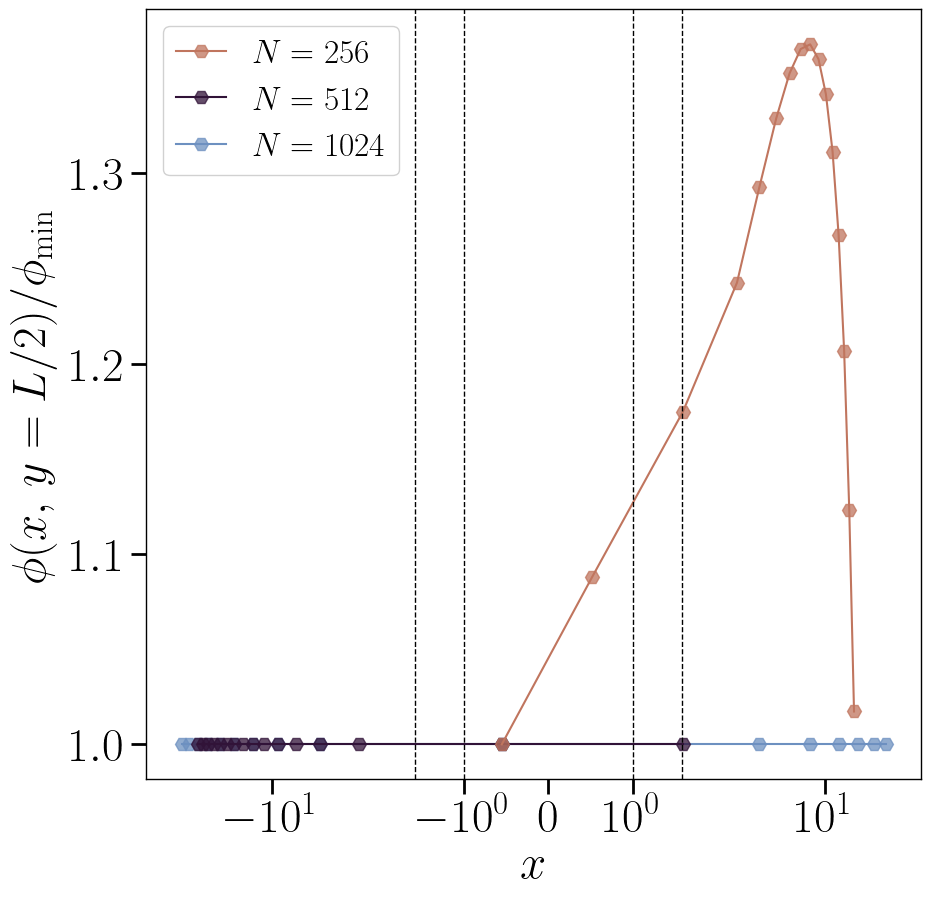

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, y=L/2)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={lattices[side].N}$"}  
    eigen_state = np.abs(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state)[lattices[side].side1//2-2, :]
    phi_plot /= np.min(phi_plot)
    
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    x -=  x[np.argmin(phi_plot)]+.55
    print(phi_plot, np.argmin(phi_plot), x[np.argmin(phi_plot)])
    ax.plot(x, phi_plot, **kwdict)
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattice.r_c, +lattice.r_c]:
    ax.axvline(i, **kwvlines)
#
# fig.savefig(f"{figpath}{lattices[sizes[0]].geometry}_singleflip.pdf", bbox_inches='tight', transparent=True)
# plt.close('all')

In [11]:
lattice.r_c

1.5682062687908012

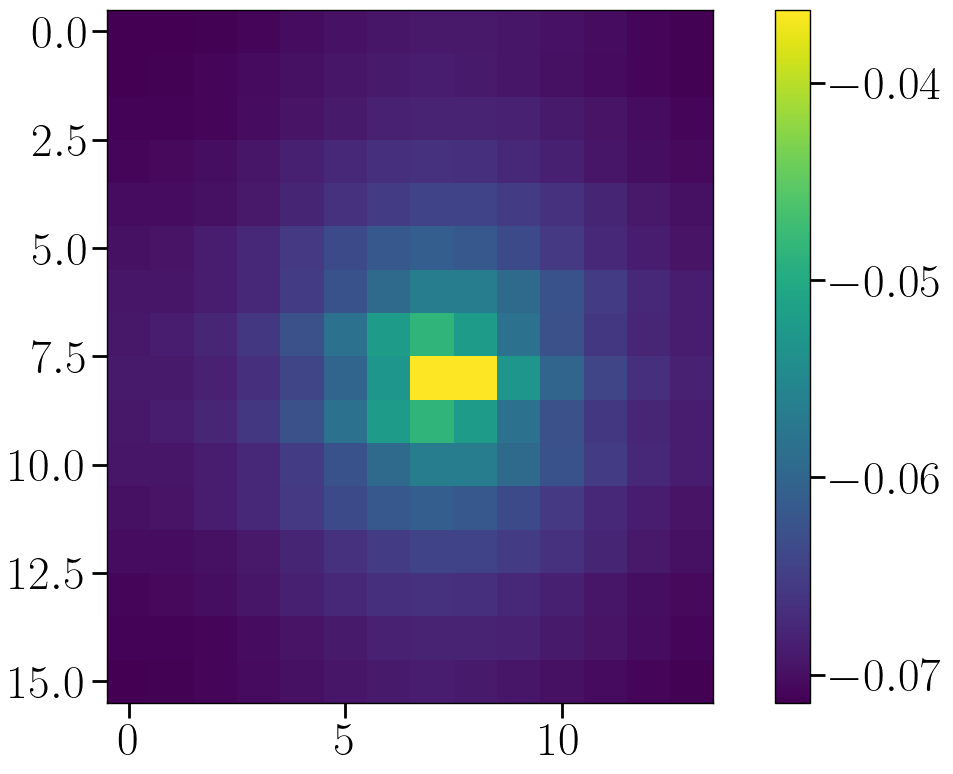

In [17]:
plt.imshow(lattices[side].eigV[0].reshape(lattices[side].syshape))
plt.colorbar()

In [ ]:
lattices[16].syshape

In [ ]:
16 * ((27+1)//2), lattices[16].N

In [ ]:
latt.neg_weights_dict.midway_e, latt.neg_weights_dict.H_cent_edge, latt.N//2

In [ ]:
m = 16
n = 55
Gt = nx.triangular_lattice_graph(m, n, periodic=True)

In [ ]:
(m) * ((n+1)//2), Gt.number_of_nodes()

### Square flip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib as mpl

def plot_square_lattice(
    ax,
    size: int = 7,
    kwargs_nodes: dict = dict(marker="o", ms=20, mec="k", mfc="w"),
    kwargs_extl: dict = dict(ls=":"),
    etxl_len: float = 0.75,
    kwargs_lines: dict = dict(lw=3),
    pec="blue",
    cpec="red",
):
    """
    Function to plot a square lattice where the color and style of each link
    can be controlled individually.
    """
    x, y = np.meshgrid(range(size), range(size))

    # Plot lines individually with control over color
    for i in range(size):
        for j in range(size):
            # Vertical lines
            if i < size - 1:
                line_color = determine_line_color(i, j, "vertical", pec, cpec)
                plot_line_with_style(ax, [x[i, j], x[i + 1, j]], [y[i, j], y[i + 1, j]], line_color, kwargs_lines, cpec)
            
            # Horizontal lines
            if j < size - 1:
                line_color = determine_line_color(i, j, "horizontal", pec, cpec)
                plot_line_with_style(ax, [x[i, j], x[i, j + 1]], [y[i, j], y[i, j + 1]], line_color, kwargs_lines, cpec)
            
            # Nodes
            ax.plot(x[i, j], y[i, j], zorder=2, **kwargs_nodes)

    # Add dashed lines on the boundaries with random colors
    add_boundary_lines(ax, size, x, y, etxl_len, kwargs_extl, pec, cpec)

    # Remove axes for a cleaner look
    ax.axis("off")

def determine_line_color(i, j, direction, pec, cpec):
    """
    Function to determine the color of a line based on its position and direction.
    Customize this function to set specific link colors.
    """
    # Example condition to set a specific link's color
    if direction == "vertical" and i == -1 and j == 4:
        return cpec
    elif direction == "horizontal" and i == 2 and j == 2:
        return cpec
    else:
        return pec

def plot_line_with_style(ax, x_coords, y_coords, color, kwargs_lines, cpec):
    """
    Helper function to plot a line with a specific color and optional style.
    """
    kwargs_lines["color"] = color
    if color == cpec:
        with mpl.rc_context({'path.sketch': (5, 15, 1)}):
            ax.plot(x_coords, y_coords, zorder=1, **kwargs_lines)
    else:
        ax.plot(x_coords, y_coords, zorder=1, **kwargs_lines)

def add_boundary_lines(ax, size, x, y, etxl_len, kwargs_extl, pec, cpec):
    """
    Function to add dashed boundary lines around the lattice.
    """
    for i in range(size):
        boundary_color = random.choice([pec, cpec])
        kwargs_extl["color"] = boundary_color
        # Left and right boundaries
        ax.plot([x[i, 0], x[i, 0] - etxl_len], [y[i, 0], y[i, 0]], zorder=0, **kwargs_extl)
        ax.plot([x[i, -1], x[i, -1] + etxl_len], [y[i, -1], y[i, -1]], zorder=0, **kwargs_extl)

        # Top and bottom boundaries
        ax.plot([x[0, i], x[0, i]], [y[0, i], y[0, i] - etxl_len], zorder=0, **kwargs_extl)
        ax.plot([x[-1, i], x[-1, i]], [y[-1, i], y[-1, i] + etxl_len], zorder=0, **kwargs_extl)

fig, ax= plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
plot_square_lattice(ax, 5)